In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


importing the necessary data

In [2]:
train_data=pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')

In [3]:
X_train=train_data.drop('Class',axis=1)
y_train=train_data['Class']
X_train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


In [4]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

dropping id for the training

In [5]:
X_train1=X_train.copy()
X_train=X_train.drop('id',axis=1)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


using mutual information to find the information gain needed

In [6]:
discrete_features=list(X_train.columns)
print(discrete_features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


using mutual info classif to find the best features for training the target features

In [7]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X_train,y_train):
    mi_scores = mutual_info_classif(X_train,y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train,y_train)
mi_scores

V14       0.001185
V17       0.001135
V2        0.000989
V3        0.000956
V21       0.000791
V10       0.000788
V7        0.000720
V8        0.000694
V11       0.000674
Amount    0.000591
V1        0.000590
V4        0.000555
V5        0.000544
V18       0.000521
V12       0.000490
V6        0.000485
V16       0.000477
V20       0.000428
V23       0.000405
V27       0.000387
V28       0.000385
V9        0.000245
V22       0.000232
Time      0.000181
V26       0.000085
V25       0.000077
V24       0.000070
V13       0.000066
V15       0.000053
V19       0.000021
Name: MI Scores, dtype: float64

lets try to plot all the mutual information scores and obtain a specific threshold 

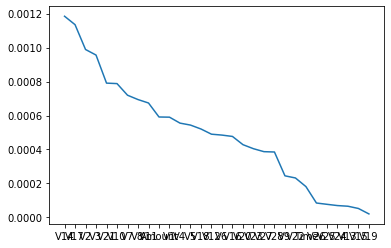

In [8]:
import matplotlib.pyplot as plt
plt.plot(mi_scores.index,mi_scores)

lets select all features above the threshold of 0.001

In [9]:
threshold=0.0006
feature=mi_scores
# Find the indexes of the rows where the feature is greater than the threshold
indexes = feature[feature > threshold].index

In [10]:
print(indexes)

Index(['V14', 'V17', 'V2', 'V3', 'V21', 'V10', 'V7', 'V8', 'V11'], dtype='object')


finding the final training dataset"

In [11]:
X_train_final=X_train[indexes]
X_train_final.head()
X_test_final=test_data[indexes]

scaling training and test data

In [12]:
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_final)

# convert the scaled data back to a pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)

# transform the test data
X_test_scaled = scaler.transform(X_test_final)

# convert the scaled data back to a pandas DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

viewing the scaled datasets

In [13]:
X_train_scaled.head()

,V14,V17,V2,V3,V21,V10,V7,V8,V11
0,0.542618,-0.496991,-0.153277,-1.526656,-0.718199,0.180730,0.292364,-0.576662,-1.252759
1,-0.264156,-0.419851,-1.120222,-0.982513,0.203208,1.154090,-1.102617,-0.138696,0.699288
2,-1.190660,0.800575,0.824427,-0.719888,-0.699333,-0.947362,1.317136,-0.327171,-0.542656
3,0.606976,-0.191776,-0.201150,-1.462031,-0.152446,0.039215,0.049435,-0.258165,0.495227
4,-0.186545,0.078138,-0.189836,0.539876,0.308014,-0.070249,-0.991706,0.586008,1.213209


In [14]:
X_test_scaled.head()

,V14,V17,V2,V3,V21,V10,V7,V8,V11
0,-2.884393,1.701181,-0.638173,-1.675036,0.645192,0.316793,-0.974097,-0.240939,0.926044
1,-0.789088,0.179392,-1.491439,-1.005833,1.358501,0.636456,-1.841196,1.290116,0.123739
2,-0.742928,0.031310,-1.396609,-0.733587,-0.237628,2.027176,-1.901407,-0.061323,0.458077
3,-0.406968,0.090593,-0.880542,-2.233562,-0.116021,-1.442818,0.466362,-0.766985,-1.047143
4,0.329516,-1.287038,-1.480516,-0.201699,0.270717,-0.367594,0.205497,-0.277054,0.325501


importing catboost

In [15]:
from catboost import CatBoostClassifier


defining a classifier model

In [16]:
model_cbc=CatBoostClassifier(iterations=100,random_state=42,eval_metric='AUC')

In [17]:
model_cbc.fit(X_train_scaled,y_train)

Learning rate set to 0.5
0:	total: 79.9ms	remaining: 7.91s
1:	total: 104ms	remaining: 5.11s
2:	total: 121ms	remaining: 3.91s
3:	total: 144ms	remaining: 3.46s
4:	total: 164ms	remaining: 3.11s
5:	total: 185ms	remaining: 2.89s
6:	total: 201ms	remaining: 2.68s
7:	total: 217ms	remaining: 2.5s
8:	total: 231ms	remaining: 2.34s
9:	total: 247ms	remaining: 2.22s
10:	total: 261ms	remaining: 2.11s
11:	total: 278ms	remaining: 2.04s
12:	total: 293ms	remaining: 1.96s
13:	total: 308ms	remaining: 1.89s
14:	total: 322ms	remaining: 1.82s
15:	total: 337ms	remaining: 1.77s
16:	total: 351ms	remaining: 1.71s
17:	total: 368ms	remaining: 1.67s
18:	total: 388ms	remaining: 1.65s
19:	total: 404ms	remaining: 1.61s
20:	total: 417ms	remaining: 1.57s
21:	total: 432ms	remaining: 1.53s
22:	total: 448ms	remaining: 1.5s
23:	total: 463ms	remaining: 1.47s
24:	total: 477ms	remaining: 1.43s
25:	total: 492ms	remaining: 1.4s
26:	total: 507ms	remaining: 1.37s
27:	total: 522ms	remaining: 1.34s
28:	total: 535ms	remaining: 1.31s
2

predicting values using the fitted model

In [18]:
pred=model_cbc.predict(X_test_scaled)

In [19]:
output=pd.DataFrame({'id':test_data['id'],'Class':pred})
output.to_csv('submission.csv',index=False)
print('Submission successful')

Submission successful


In [20]:
output.head()

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0


**first submission.**